In [1]:
import pandas as pd
import numpy as np

data = np.array(pd.read_csv('data/train.csv'))
m, n = data.shape
print(data.shape)

(42000, 785)


In [2]:
x_train = np.array([r[1:n] for r in data[0:int(m*0.9)]])
y_train = np.array([r[0] for r in data[0:int(m*0.9)]])

x_test = np.array([r[1:n] for r in data[int(m*0.9):m]])
y_test = np.array([r[0] for r in data[int(m*0.9):m]])

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(37800, 784) (37800,) (4200, 784) (4200,)


In [3]:
import torch
import torch.nn as nn
from tqdm import trange

net = nn.Sequential(
    nn.Linear(28*28, 128), 
    nn.ReLU(),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Linear(128, 10),
    nn.LogSoftmax(dim=1))

batch_size = 128
n_epochs = 1000
loss_fn = nn.CrossEntropyLoss(reduction='none')
optim = torch.optim.Adam(net.parameters(), lr=0.001)
losses, accuracies = [], []

for k in (t := trange(n_epochs)):
    samp = np.random.randint(0, x_train.shape[0], batch_size)
    X = torch.tensor(x_train[samp].reshape((-1, 28*28))).float()
    Y = torch.tensor(y_train[samp]).long()
    net.zero_grad()

    # forward pass
    y_preds = net(X)

    # accuracy
    cat = torch.argmax(y_preds, dim=1)
    accuracy = (cat == Y).float().mean()
    
    # loss
    loss = loss_fn(y_preds, Y)
    loss = loss.mean()

    # backward pass
    loss.backward()
    optim.step()

    loss, accuracy = loss.item(), accuracy.item()
    losses.append(loss)
    accuracies.append(accuracy)
    t.set_description("loss %.2f accuracy %.2f" % (loss, accuracy))

loss 0.07 accuracy 0.98: 100%|██████████| 1000/1000 [00:02<00:00, 449.36it/s]


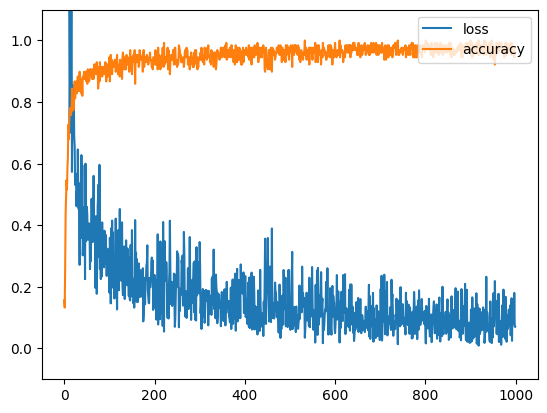

In [4]:
import matplotlib.pyplot as plt

plt.ylim(-0.1, 1.1)
plt.plot(losses)
plt.plot(accuracies)
plt.legend(['loss', 'accuracy'], loc='upper right')

In [5]:
test_results = torch.argmax(net(torch.tensor(x_test.reshape((-1, 28*28))).float()), dim=1).numpy()
(y_test == test_results).mean()

0.955952380952381

[14]# Label: 3 | Pred: 8


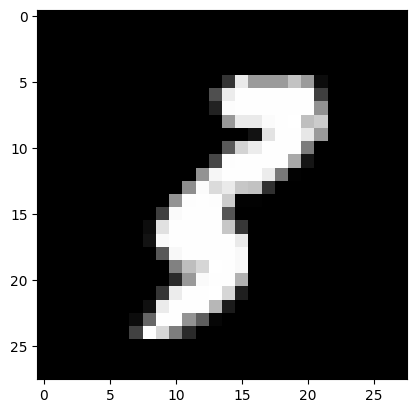

In [6]:
# Check first label and prediction difference

for idx in range(len(test_results)):
    pred_ = test_results[idx]
    label_ = y_test[idx]
    if pred_ != label_:
        print(f"[{idx}]# Label: {label_} | Pred: {pred_}")
        current_image = x_test[idx].reshape((28, 28)) * 255
        plt.gray()
        plt.imshow(current_image, interpolation='nearest')
        plt.show()
        break

5

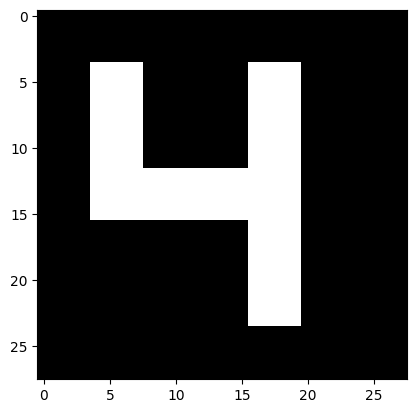

In [7]:
# Check prediction for manually inserted label

m = [[0,0,0,0,0,0,0],
     [0,0,1,0,1,0,0],
     [0,0,1,0,1,0,0],
     [0,0,1,1,1,0,0],
     [0,0,0,0,1,0,0],
     [0,0,0,0,1,0,0],
     [0,0,0,0,0,0,0]]
m = np.concatenate([np.concatenate([[x]*4 for x in y]*4) for y in m])
plt.imshow(m.reshape(28,28))
torch.argmax(net(torch.tensor(m.reshape((-1, 28*28))).float()), dim=1).item()